# Imports and helper functions

In [230]:
from pandas import Series, read_csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

def outliers_by_boxplot(series: Series) -> Series:
    plot = plt.boxplot(series)
    plt.show()
    lower_whisker = plot['whiskers'][0].get_ydata()[1]
    upper_whisker = plot['whiskers'][1].get_ydata()[1]
    outliers = Series([v if v < lower_whisker or v > upper_whisker else None for v in series.values])
    
    return outliers.dropna()


def zscore(series: Series) -> Series:
    return Series((series - series.mean()) / series.std())

# Task 2 - Anomaly identification in global land temperature changes

**Read the data**

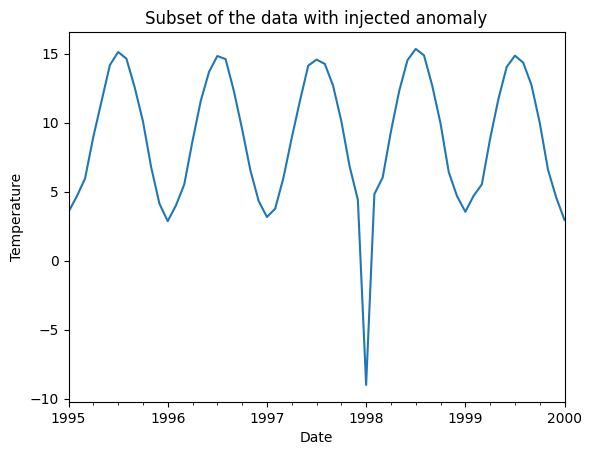

In [256]:
data = read_csv('GlobalTemperatures.csv', parse_dates=['dt'])
series = Series(data['LandAverageTemperature'].values, index=data['dt'])
series = series.fillna(method='ffill')
series_trim = series['1995-01-01':'2000-01-01']
series_trim.loc['1998-01-01'] = -9.0

series_trim.plot()
plt.title('Subset of the data with injected anomaly')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

**Boxplot and find outliers programmatically**

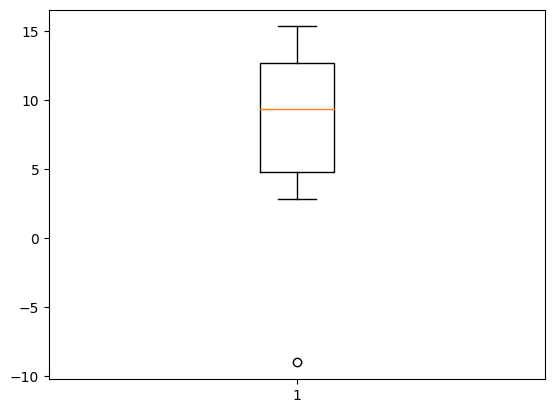

          dt    0
0 1998-01-01 -9.0


In [249]:
outliers = outliers_by_boxplot(series_trim)
print(series_trim[series_trim.isin(outliers)].reset_index())

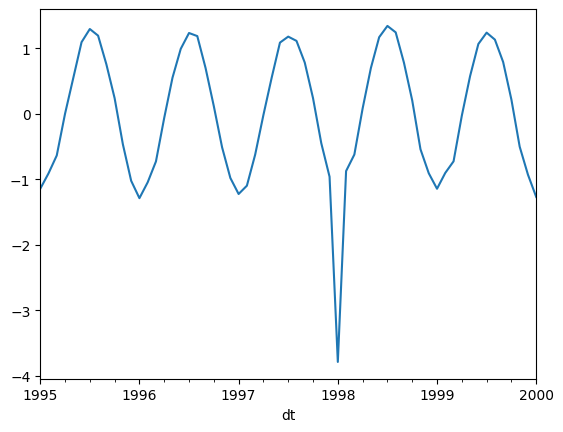

dt
1998-01-01   -3.785727
dtype: float64


In [255]:
zscores = zscore(series_trim)
zscores.plot()
plt.show()
zscores = zscores[zscores.abs() > 2]
print(zscores)

**Seasonal decomposition** and then **Z-score** to find outliers

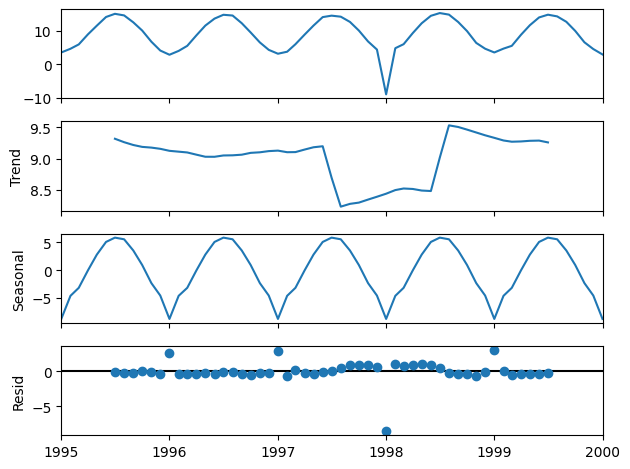

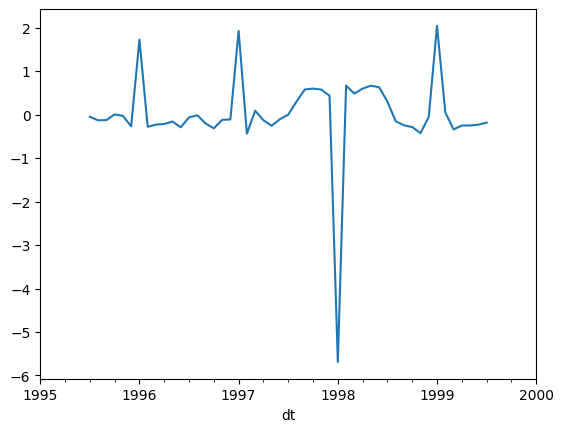

dt
1998-01-01   -5.688017
1999-01-01    2.039484
Name: resid, dtype: float64


In [258]:
decomp = seasonal_decompose(series_trim, model='additive', period=12)
decomp.plot()
plt.show()

zscores = zscore(decomp.resid)
zscores.plot()
plt.show()
notable_zscores = zscores[zscores.abs() > 2]
print(notable_zscores)